In [206]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acoustic-extinguisher-fire-dataset/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx
/kaggle/input/acoustic-extinguisher-fire-dataset/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.arff
/kaggle/input/acoustic-extinguisher-fire-dataset/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset_Citation_Request.txt


In [207]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, log_loss 

In [208]:
# dataframe
df = pd.read_excel('/kaggle/input/acoustic-extinguisher-fire-dataset/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')

In [209]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [210]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SIZE,17442.0,3.411765,1.750977,1.0,2.0,3.0,5.0,7.0
DISTANCE,17442.0,100.000000,54.773826,10.0,50.0,100.0,150.0,190.0
DESIBEL,17442.0,96.379142,8.164096,72.0,90.0,95.0,104.0,113.0
AIRFLOW,17442.0,6.975634,4.736169,0.0,3.2,5.8,11.2,17.0
FREQUENCY,17442.0,31.611111,20.939149,1.0,14.0,27.5,47.0,75.0
STATUS,17442.0,0.497821,0.500010,0.0,0.0,0.0,1.0,1.0


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [212]:
# One-hot encoding uygulama
one_hot_encoded = pd.get_dummies(df['FUEL'], prefix='FUEL', dtype=int)

# Sonuçları ana DataFrame'e eklemek
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

df_encoded = df_encoded.drop("FUEL",axis=1)
# İlk beş satırı gösterme
df_encoded.head()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,FUEL_gasoline,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1,10,96,0.0,75,0,1,0,0,0
1,1,10,96,0.0,72,1,1,0,0,0
2,1,10,96,2.6,70,1,1,0,0,0
3,1,10,96,3.2,68,1,1,0,0,0
4,1,10,109,4.5,67,1,1,0,0,0


In [213]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SIZE           17442 non-null  int64  
 1   DISTANCE       17442 non-null  int64  
 2   DESIBEL        17442 non-null  int64  
 3   AIRFLOW        17442 non-null  float64
 4   FREQUENCY      17442 non-null  int64  
 5   STATUS         17442 non-null  int64  
 6   FUEL_gasoline  17442 non-null  int64  
 7   FUEL_kerosene  17442 non-null  int64  
 8   FUEL_lpg       17442 non-null  int64  
 9   FUEL_thinner   17442 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.3 MB


In [214]:
for column in df_encoded:
    df_encoded[column] = df_encoded[column].apply(lambda x: float(x))

In [215]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SIZE           17442 non-null  float64
 1   DISTANCE       17442 non-null  float64
 2   DESIBEL        17442 non-null  float64
 3   AIRFLOW        17442 non-null  float64
 4   FREQUENCY      17442 non-null  float64
 5   STATUS         17442 non-null  float64
 6   FUEL_gasoline  17442 non-null  float64
 7   FUEL_kerosene  17442 non-null  float64
 8   FUEL_lpg       17442 non-null  float64
 9   FUEL_thinner   17442 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


 **Modelling**

In [216]:
df_encoded.head()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,FUEL_gasoline,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1.0,10.0,96.0,0.0,75.0,0.0,1.0,0.0,0.0,0.0
1,1.0,10.0,96.0,0.0,72.0,1.0,1.0,0.0,0.0,0.0
2,1.0,10.0,96.0,2.6,70.0,1.0,1.0,0.0,0.0,0.0
3,1.0,10.0,96.0,3.2,68.0,1.0,1.0,0.0,0.0,0.0
4,1.0,10.0,109.0,4.5,67.0,1.0,1.0,0.0,0.0,0.0


In [217]:
y = df_encoded["STATUS"]
X = df_encoded.drop("STATUS", axis = 1)

In [218]:
# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SIZE           17442 non-null  float64
 1   DISTANCE       17442 non-null  float64
 2   DESIBEL        17442 non-null  float64
 3   AIRFLOW        17442 non-null  float64
 4   FREQUENCY      17442 non-null  float64
 5   STATUS         17442 non-null  float64
 6   FUEL_gasoline  17442 non-null  float64
 7   FUEL_kerosene  17442 non-null  float64
 8   FUEL_lpg       17442 non-null  float64
 9   FUEL_thinner   17442 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


In [220]:
# Generate a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
svc_model = SVC()
dt_model = DecisionTreeClassifier()

# Train the models
svc_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
svc_predictions = svc_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

# Evaluate accuracy
svc_accuracy = accuracy_score(y_test, svc_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Print the results
print("SVC Accuracy:", svc_accuracy)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

SVC Accuracy: 0.96
Decision Tree Classifier Accuracy: 0.825


/tmp/ipykernel_32/1758315535.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')  # Choose a colormap


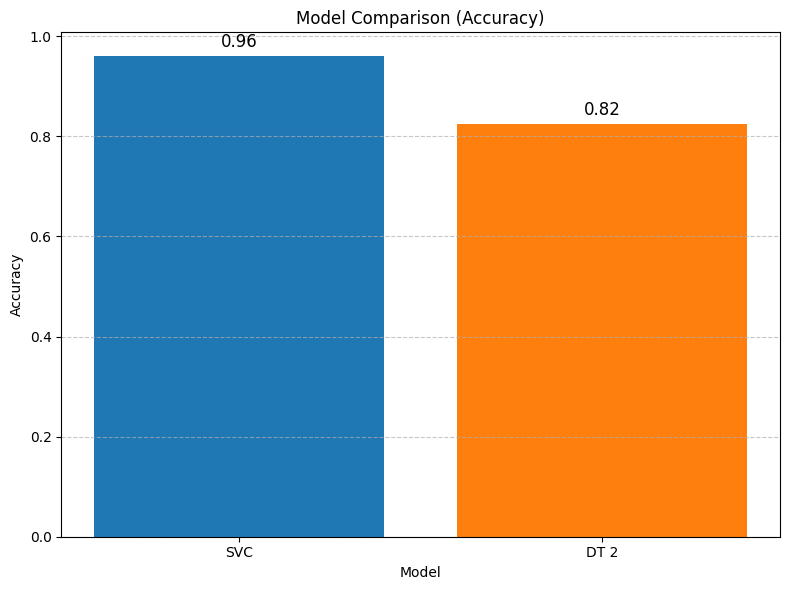

In [221]:
import matplotlib.cm as cm

# Assuming you have more models and accuracy values
model_names = ['SVC', 'DT 2']
accuracy_values = [svc_accuracy, dt_accuracy]

cmap = cm.get_cmap('tab10')  # Choose a colormap
colors = cmap(np.arange(len(model_names)) % cmap.N)  # Generate colors for each model


# Create the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracy_values, color=colors)

# Calculate bar positions for centering text annotations
bar_positions = [bar.get_x() + bar.get_width() / 2 for bar in bars]

# Add annotations with accuracy values formatted to two decimal places
for pos, value in zip(bar_positions, accuracy_values):
    plt.text(pos, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=12)  # Adjust offset and formatting

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison (Accuracy)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()